# PCA

In [1]:
from conx import *
import random

conx, version 3.4.3
Using Theano backend.


In [2]:
def test_patterns(net, tolerance=0.4):
    pc = [] # positive correct
    nc = [] # negative correct
    pw = [] # positive wrong
    nw = [] # negative wrong
    for vector in positives:
        output = net.propagate(vector, visualize=False)[0]
        if abs(output - 1.0) < tolerance:
            pc.append(vector)
        else:
            pw.append(vector)
    for vector in negatives:
        output = net.propagate(vector, visualize=False)[0]
        if abs(output - 0.0) < tolerance:
            nc.append(vector)
        else:
            nw.append(vector)
    return [
        ["Positive (correct)", "w+", pc], 
        ["Negative (correct)", "wx", nc],
        ["Positive (wrong)", "k+", pw], 
        ["Negative (wrong)", "kx", nw], 
    ]

## Non-Linearly Separable

In [3]:
import math

In [4]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [5]:
negatives = []
while len(negatives) < 500:
    x = random.random()
    y = random.random()
    d = distance(x, y, 0.5, 0.5)
    if d > 0.375 and d < 0.5:
        negatives.append([x, y])
positives = []
while len(positives) < 500:
    x = random.random()
    y = random.random()
    d = distance(x, y, 0.5, 0.5)
    if d < 0.25:
        positives.append([x, y])

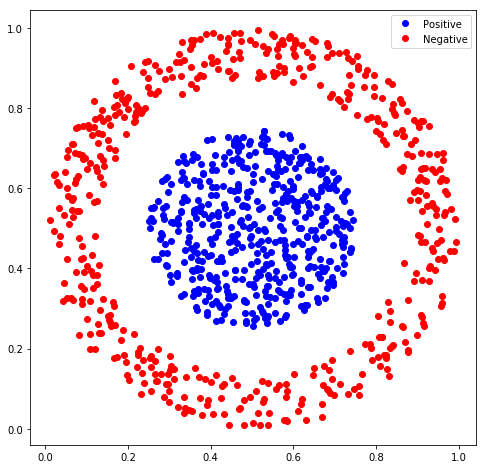

In [6]:
scatter([
         ["Positive", "bo", positives], 
         ["Negative", "ro", negatives],
        ], height=8.0, width=8.0)

In [7]:
net = Network("Non-Linearly Separable", 2, 5, 1, activation="sigmoid")
net.compile(error="mae", optimizer="adam") 

In [8]:
net

<IPython.core.display.Javascript object>

<Network name='Non-Linearly Separable' (compiled)>

In [9]:
ds = Dataset()

In [10]:
ds.load([(p, [ 1.0]) for p in positives] +
        [(n, [ 0.0]) for n in negatives])

In [11]:
ds.shuffle()

In [12]:
ds.split(.1)

In [13]:
net.set_dataset(ds)

In [14]:
net.test(tolerance=0.4)

Testing train dataset with tolerance 0.4...
Total count: 900
      correct: 453
      incorrect: 447
Total percentage correct: 0.5033333333333333
Testing validation dataset with tolerance 0.4...
Total count: 100
      correct: 47
      incorrect: 53
Total percentage correct: 0.47


In [15]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=2, options=('input', 'hidden', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

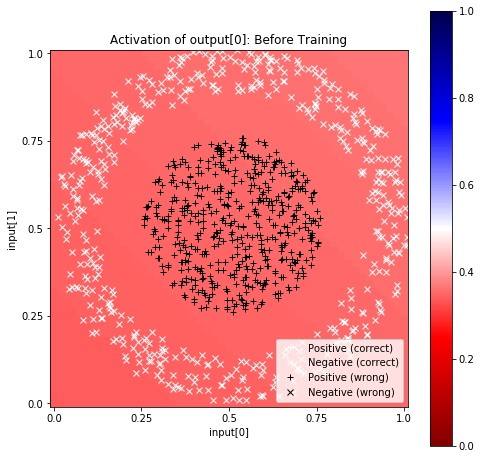

In [16]:
net.plot_activation_map(scatter=test_patterns(net), title="Before Training")

You may want to either `net.reset()` or `net.retrain()` if the following cell doesn't complete with 100% accuracy. Calling `net.reset()` may be needed if the network has landed in a local maxima; `net.retrain()` may be necessary if the network just needs additional training.

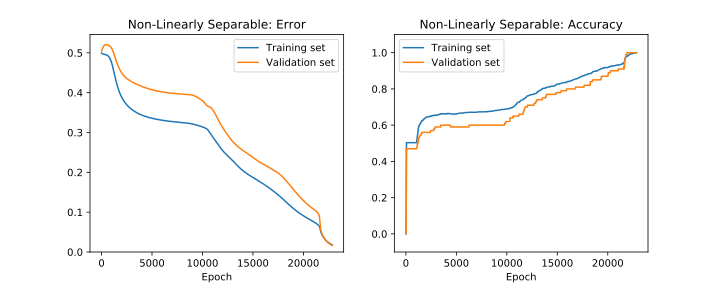

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#22843 |   0.01803 |   1.00000 |   0.01655 |   1.00000 


In [66]:
net.train(epochs=10000, accuracy=1.0, report_rate=50, 
          tolerance=0.4, batch_size=len(net.dataset.train_inputs), 
          plot=True, record=100)

In [17]:
#net.save()
net.load()

In [23]:
states = []
for inputs in net.dataset.inputs:
    hid = net.propagate_to("hidden", inputs)
    states.append(hid)
pca = net.compute_pca(states)
states_pca = pca.transform(states)
xmin = min([state[0] for state in states_pca])
xmax = max([state[0] for state in states_pca])
ymin = min([state[1] for state in states_pca])
ymax = max([state[1] for state in states_pca])

In [24]:
def test_patterns_pca(net, tolerance=0.4):
    pc = [] # positive correct
    nc = [] # negative correct
    pw = [] # positive wrong
    nw = [] # negative wrong
    for vector in positives:
        output = net.propagate(vector, visualize=False)[0]
        hid = net.propagate_to("hidden", vector, visualize=False)
        vector = pca.transform([hid])[0]
        if abs(output - 1.0) < tolerance:
            pc.append((vector[0], vector[1]))
        else:
            pw.append(vector)
    for vector in negatives:
        output = net.propagate(vector, visualize=False)[0]
        hid = net.propagate_to("hidden", vector, visualize=False)
        vector = pca.transform([hid])[0]
        if abs(output - 0.0) < tolerance:
            nc.append((vector[0], vector[1]))
        else:
            nw.append((vector[0], vector[1]))
    return [
        ["Positive (correct)", "b+", pc], 
        ["Negative (correct)", "rx", nc],
        ["Positive (wrong)", "k+", pw], 
        ["Negative (wrong)", "kx", nw], 
    ]

SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='Non-Linearly Separable Playback:', layout=Layout(width='100%'), max=229, style=SliderStyle(description_width='initial')), Label(value='of 230', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

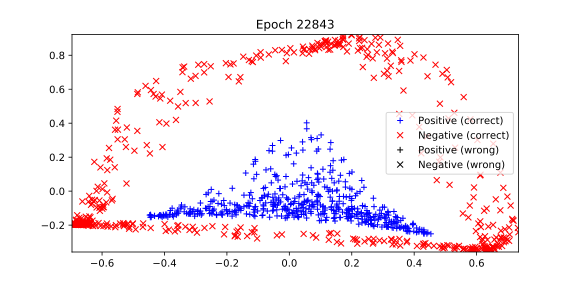

In [25]:
net.playback(lambda net, epoch: scatter(test_patterns_pca(net), 
                                        xmin=xmin,
                                        xmax=xmax,
                                        ymin=ymin,
                                        ymax=ymax,
                                        title="Epoch %s" % epoch, interactive=False))